In [1]:
from main import *
from bovw import *
from plotting import *

In [2]:
import os
import random
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
SEED = 42

random.seed(SEED)
np.random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)

In [4]:
data_train = Dataset(ImageFolder="../data/places_reduced/train")
data_test = Dataset(ImageFolder="../data/places_reduced/val")

len(data_train), len(data_test)

(8700, 2200)

In [5]:
random.shuffle(data_train)
random.shuffle(data_test)

In [7]:
classifier_results = {}

for penalty in [None, "l1", "l2", "elasticnet"]:
    bovw_params = {
        "detector_type": "SIFT",
        "codebook_size": 512,
        "detector_kwargs": {"nfeatures": 1000},
    }
    
    classifier_cls = LogisticRegression
    classifier_params = {
        "max_iter": 1000,
        "class_weight": "balanced",
        "penalty": penalty,
        "solver": "saga",
        "l1_ratio": 0.5 if penalty == "elasticnet" else None
    }
    
    scores = cross_validate_bovw(
        dataset=data_train,
            bovw_kwargs=bovw_params,
            classifier_cls=classifier_cls,
            classifier_kwargs=classifier_params,
            n_splits=5
    )
        
    classifier_results[penalty] = scores


print("\nSIFT SUMMARY")
for size in classifier_results.keys():
    print(f"codebook_size={size} -> Accuracy Train: {classifier_results[size].train.accuracy.mean:.4f} ± {classifier_results[size].train.accuracy.std:.4f}")
    print(f"codebook_size={size} -> Accuracy Test: {classifier_results[size].val.accuracy.mean:.4f} ± {classifier_results[size].val.accuracy.std:.4f}")
    print()

Phase [Setup]: Extracting the descriptors:  49%|████▉     | 4287/8700 [00:01<00:01, 2334.27it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2310.41it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


 20%|██        | 1/5 [01:36<06:25, 96.37s/it]/home/arnau-marcos-almansa/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
 40%|████      | 2/5 [03:21<05:03, 101.28s/it]/home/arnau-marcos-almansa/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
 60%|██████    | 3/5 [05:05<03:25, 102.55s/it]/home/arnau-marcos-almansa/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
 80%|████████  | 4/5 [06:49<01:43, 103.31s/it]/home/arnau-marcos-almansa/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Phase [Setup]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2633.15it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


Phase [Setup]: Extracting the descriptors:  49%|████▉     | 4285/8700 [00:01<00:01, 2682.72it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2635.47it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


Phase [Setup]: Extracting the descriptors:  52%|█████▏    | 4498/8700 [00:01<00:01, 2630.39it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2604.74it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


100%|██████████| 5/5 [00:55<00:00, 11.06s/it]


SIFT SUMMARY
codebook_size=None -> Accuracy Train: 0.5339 ± 0.0046
codebook_size=None -> Accuracy Test: 0.2671 ± 0.0106

codebook_size=l1 -> Accuracy Train: 0.4102 ± 0.0024
codebook_size=l1 -> Accuracy Test: 0.3242 ± 0.0169

codebook_size=l2 -> Accuracy Train: 0.4469 ± 0.0049
codebook_size=l2 -> Accuracy Test: 0.3252 ± 0.0068

codebook_size=elasticnet -> Accuracy Train: 0.4303 ± 0.0046
codebook_size=elasticnet -> Accuracy Test: 0.3266 ± 0.0152



In [21]:
def plot_cv_train_test_comparison(x_values, train_fold_values, test_fold_values,
                                   descriptor_name, hyperparam_name, ylim=(0, 1), show_points=True):
    """
    Plot both train and test CV validation accuracy vs a hyperparameter side by side.

    Shows individual fold results for both training and testing performance,
    allowing easy comparison of overfitting/underfitting.

    Args:
        x_values: List/array of hyperparameter values (e.g., [128, 256, 512])
        train_fold_values: List of lists with training accuracy from all CV folds
                          Shape: (n_hyperparams, n_folds)
        test_fold_values: List of lists with test accuracy from all CV folds
                         Shape: (n_hyperparams, n_folds)
        descriptor_name: Name of the descriptor (e.g., "SIFT")
        hyperparam_name: Name of the hyperparameter (e.g., "Codebook Size")
        ylim: Tuple (ymin, ymax) for y-axis limits. Default is (0, 1).
              Set to None for automatic scaling.
        show_points: If True (default), show individual fold points overlaid on the plot.

    Example:
        x_values = [128, 256, 512]
        train_fold_values = [
            [0.45, 0.46, 0.44, 0.47, 0.45],  # 5 fold train accuracies for size=128
            [0.48, 0.49, 0.47, 0.50, 0.48],  # for size=256
            [0.52, 0.53, 0.51, 0.54, 0.52],  # for size=512
        ]
        test_fold_values = [
            [0.32, 0.33, 0.31, 0.34, 0.32],  # 5 fold test accuracies for size=128
            [0.35, 0.36, 0.34, 0.37, 0.35],  # for size=256
            [0.38, 0.39, 0.37, 0.40, 0.38],  # for size=512
        ]
        plot_cv_train_test_comparison(x_values, train_fold_values, test_fold_values,
                                      "SIFT", "Codebook Size")
    """

    plt.figure(figsize=(12, 6))

    positions = np.arange(len(x_values))

    # Plot training results
    for i, (pos, values) in enumerate(zip(positions, train_fold_values)):
        values = np.array(values)
        mean_val = np.mean(values)
        min_val = np.min(values)
        max_val = np.max(values)

        # Plot vertical line from min to max
        plt.plot([pos, pos], [min_val, max_val],
                color='darkgreen', linewidth=3, alpha=0.5, zorder=1)

        # Plot mean as a horizontal line
        plt.plot([pos - 0.15, pos + 0.15], [mean_val, mean_val],
                color='green', linewidth=4, label='Train Mean' if i == 0 else '', zorder=2)

        # Plot individual points with slight jitter for horizontal separation
        if show_points:
            jitter = np.random.normal(-0.08, 0.02, size=len(values))  # Offset left
            plt.scatter([pos + j for j in jitter], values,
                       color='green', s=100, alpha=0.7, zorder=4, marker='o',
                       edgecolors='darkgreen', linewidths=1.5,
                       label='Train Folds' if i == 0 else '')

    # Plot test results (same position, different marker)
    for i, (pos, values) in enumerate(zip(positions, test_fold_values)):
        values = np.array(values)
        mean_val = np.mean(values)
        min_val = np.min(values)
        max_val = np.max(values)

        # Plot vertical line from min to max
        plt.plot([pos, pos], [min_val, max_val],
                color='darkblue', linewidth=3, alpha=0.5, zorder=1)

        # Plot mean as a horizontal line
        plt.plot([pos - 0.15, pos + 0.15], [mean_val, mean_val],
                color='blue', linewidth=4, label='Test Mean' if i == 0 else '', zorder=2)

        # Plot individual points with slight jitter for horizontal separation
        if show_points:
            jitter = np.random.normal(0.08, 0.02, size=len(values))  # Offset right
            plt.scatter([pos + j for j in jitter], values,
                       color='blue', s=100, alpha=0.7, zorder=4, marker='s',
                       edgecolors='darkblue', linewidths=1.5,
                       label='Test Folds' if i == 0 else '')

    # Set x-axis labels
    plt.xticks(positions, x_values)

    # Set y-axis limits
    if ylim is not None:
        plt.ylim(ylim)

    plt.title(f"{descriptor_name} — Train vs Test Accuracy vs {hyperparam_name}\n(5-Fold Cross-Validation)",
              fontsize=14, fontweight='bold')
    plt.xlabel(hyperparam_name, fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.3, axis='y')

    # Add legend
    plt.legend(loc='best', fontsize=10)

    plt.tight_layout()
    plt.show()


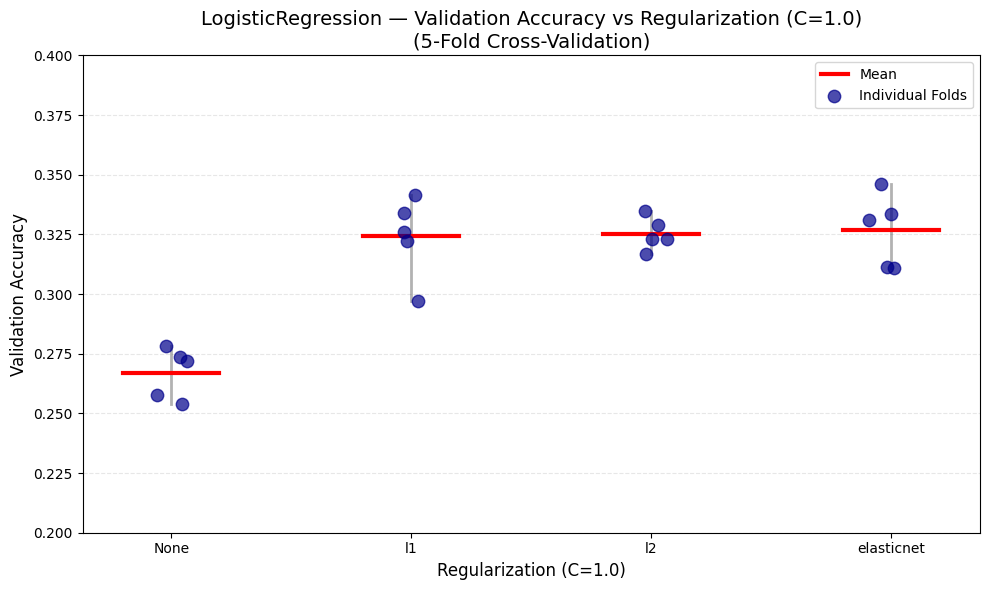

In [11]:
x_vals = [None, "l1", "l2", "elasticnet"]
printable_x_vals = ["None", "l1", "l2", "elasticnet"]
all_accuracies = [classifier_results[key].val.accuracy.all for key in x_vals]
plot_cv_accuracy_boxplot(printable_x_vals, all_accuracies, "LogisticRegression", "Regularization (C=1.0)", ylim=(0.2, 0.4))

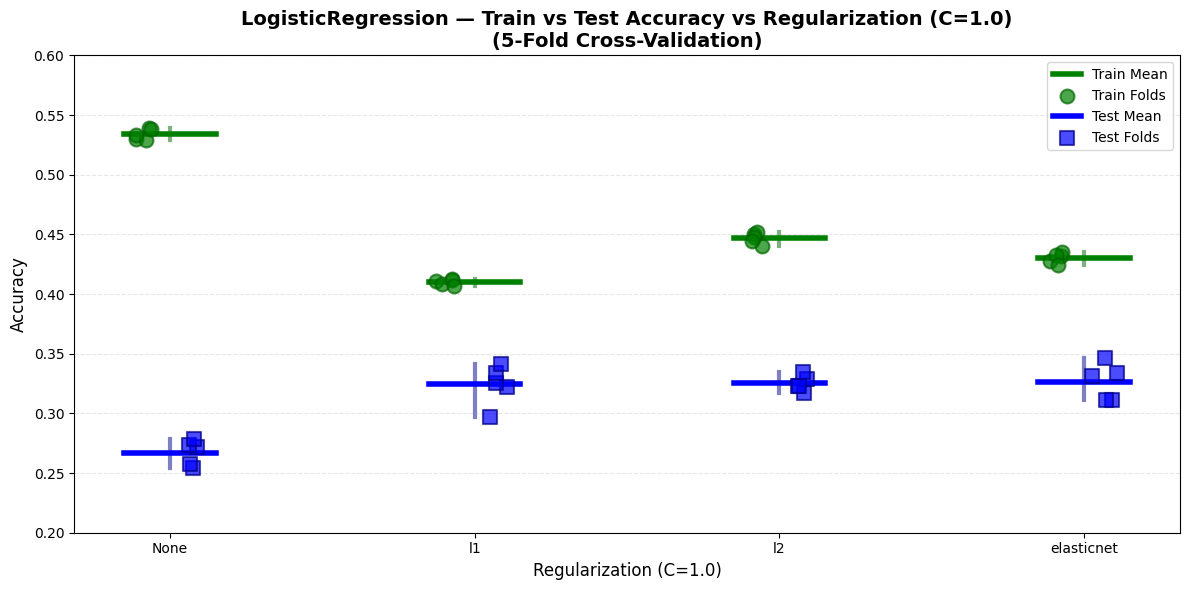

In [22]:
x_vals = [None, "l1", "l2", "elasticnet"]
printable_x_vals = ["None", "l1", "l2", "elasticnet"]
test_vals = [classifier_results[key].val.accuracy.all for key in x_vals]
train_vals = [classifier_results[key].train.accuracy.all for key in x_vals]
plot_cv_train_test_comparison(printable_x_vals, train_vals, test_vals, "LogisticRegression", "Regularization (C=1.0)", ylim=(0.2, 0.6))

In [16]:
test_vals = [classifier_results[key].val.accuracy.all for key in x_vals]
train_vals = [classifier_results[key].train.accuracy.all for key in x_vals]

test_vals

[[0.2718390804597701,
  0.2540229885057471,
  0.2735632183908046,
  0.2783208740655549,
  0.2576193214491087],
 [0.2971264367816092,
  0.32241379310344825,
  0.3258620689655172,
  0.3341000575043128,
  0.34157561817136284],
 [0.32298850574712645,
  0.31666666666666665,
  0.32873563218390806,
  0.3231742380678551,
  0.33467510063254746],
 [0.3114942528735632,
  0.3310344827586207,
  0.31091954022988505,
  0.33352501437607823,
  0.3461759631972398]]

In [23]:
# Experiment: L2 penalty with different C values
l2_c_results = {}

bovw_params = {
    "detector_type": "SIFT",
    "codebook_size": 512,
    "detector_kwargs": {"nfeatures": 1000},
}

for C in [0.01, 0.1, 1.0, 10.0, 100.0]:
    print(f"\n=== Testing L2 with C={C} ===")
    
    classifier_cls = LogisticRegression
    classifier_params = {
        "C": C,
        "penalty": "l2",
        "max_iter": 1000,
        "class_weight": "balanced",
        "random_state": SEED,
    }
    
    scores = cross_validate_bovw(
        dataset=data_train,
        bovw_kwargs=bovw_params,
        classifier_cls=classifier_cls,
        classifier_kwargs=classifier_params,
        n_splits=5
    )
    
    l2_c_results[C] = scores
    print(f"C={C} -> Test Accuracy: {scores.val.accuracy.mean:.4f} ± {scores.val.accuracy.std:.4f}")


print("\n\n=== L2 PENALTY: C COMPARISON ===")
for C, result in l2_c_results.items():
    print(f"C={C:6.2f} -> Train: {result.train.accuracy.mean:.4f} ± {result.train.accuracy.std:.4f} | Test: {result.val.accuracy.mean:.4f} ± {result.val.accuracy.std:.4f}")


=== Testing L2 with C=0.01 ===


Phase [Setup]: Extracting the descriptors:  50%|█████     | 4385/8700 [00:01<00:01, 2702.77it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2672.58it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


100%|██████████| 5/5 [00:32<00:00,  6.56s/it]


C=0.01 -> Test Accuracy: 0.2609 ± 0.0052

=== Testing L2 with C=0.1 ===


Phase [Setup]: Extracting the descriptors:  49%|████▉     | 4294/8700 [00:01<00:01, 2694.24it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2659.08it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


100%|██████████| 5/5 [00:40<00:00,  8.11s/it]


C=0.1 -> Test Accuracy: 0.3011 ± 0.0117

=== Testing L2 with C=1.0 ===


Phase [Setup]: Extracting the descriptors:  49%|████▉     | 4290/8700 [00:01<00:01, 2697.00it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2655.95it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


100%|██████████| 5/5 [01:01<00:00, 12.39s/it]


C=1.0 -> Test Accuracy: 0.3326 ± 0.0076

=== Testing L2 with C=10.0 ===


Phase [Setup]: Extracting the descriptors:  52%|█████▏    | 4529/8700 [00:01<00:01, 2653.77it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2632.54it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


100%|██████████| 5/5 [01:40<00:00, 20.09s/it]


C=10.0 -> Test Accuracy: 0.3031 ± 0.0073

=== Testing L2 with C=100.0 ===


Phase [Setup]: Extracting the descriptors:  52%|█████▏    | 4530/8700 [00:01<00:01, 2660.27it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2657.06it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


100%|██████████| 5/5 [02:20<00:00, 28.16s/it]

C=100.0 -> Test Accuracy: 0.2798 ± 0.0073


=== L2 PENALTY: C COMPARISON ===
C=  0.01 -> Train: 0.2758 ± 0.0023 | Test: 0.2609 ± 0.0052
C=  0.10 -> Train: 0.3411 ± 0.0023 | Test: 0.3011 ± 0.0117
C=  1.00 -> Train: 0.4469 ± 0.0013 | Test: 0.3326 ± 0.0076
C= 10.00 -> Train: 0.5187 ± 0.0063 | Test: 0.3031 ± 0.0073
C=100.00 -> Train: 0.5357 ± 0.0066 | Test: 0.2798 ± 0.0073


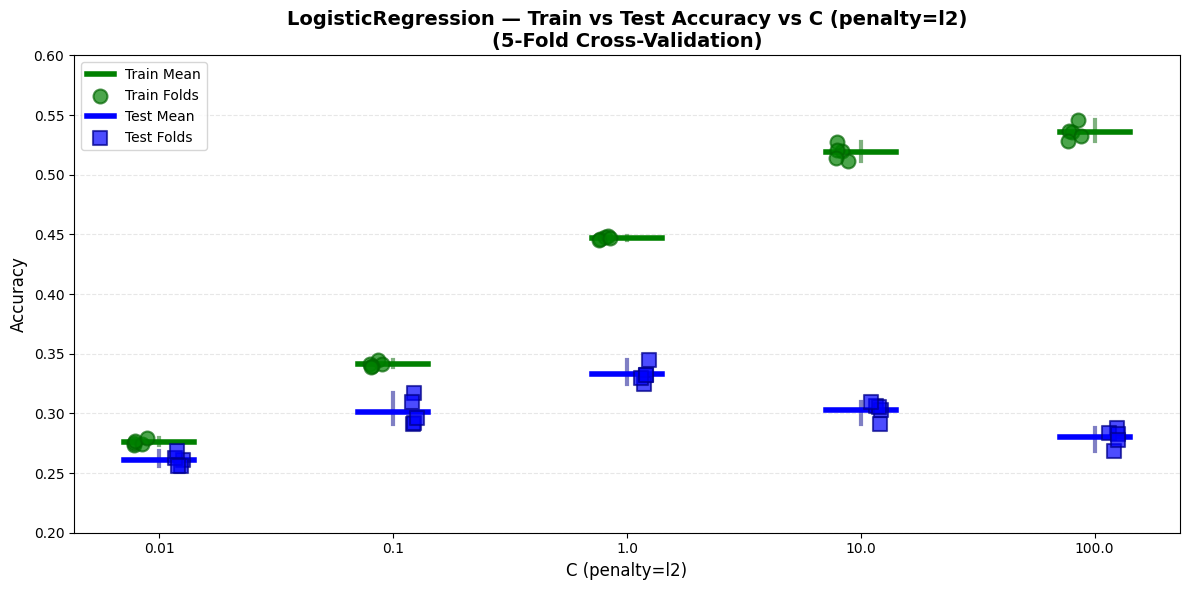

In [24]:
x_vals = [0.01, 0.1, 1.0, 10.0, 100.0]
printable_x_vals = [0.01, 0.1, 1.0, 10.0, 100.0]
test_vals = [l2_c_results[key].val.accuracy.all for key in x_vals]
train_vals = [l2_c_results[key].train.accuracy.all for key in x_vals]
plot_cv_train_test_comparison(printable_x_vals, train_vals, test_vals, "LogisticRegression", "C (penalty=l2)", ylim=(0.2, 0.6))

In [25]:
# Experiment: L1 penalty with different C values
l1_c_results = {}

bovw_params = {
    "detector_type": "SIFT",
    "codebook_size": 512,
    "detector_kwargs": {"nfeatures": 1000},
}

for C in [0.01, 0.1, 1.0, 10.0, 100.0]:
    print(f"\n=== Testing L1 with C={C} ===")
    
    classifier_cls = LogisticRegression
    classifier_params = {
        "C": C,
        "penalty": "l1",
        "solver": "saga",
        "max_iter": 1000,
        "class_weight": "balanced",
        "random_state": SEED,
    }
    
    scores = cross_validate_bovw(
        dataset=data_train,
        bovw_kwargs=bovw_params,
        classifier_cls=classifier_cls,
        classifier_kwargs=classifier_params,
        n_splits=5
    )
    
    l1_c_results[C] = scores
    print(f"C={C} -> Test Accuracy: {scores.val.accuracy.mean:.4f} ± {scores.val.accuracy.std:.4f}")


print("\n\n=== L1 PENALTY: C COMPARISON ===")
for C, result in l1_c_results.items():
    print(f"C={C:6.2f} -> Train: {result.train.accuracy.mean:.4f} ± {result.train.accuracy.std:.4f} | Test: {result.val.accuracy.mean:.4f} ± {result.val.accuracy.std:.4f}")


=== Testing L1 with C=0.01 ===


Phase [Setup]: Extracting the descriptors:  50%|████▉     | 4329/8700 [00:01<00:01, 2686.83it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2655.23it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


  0%|          | 0/5 [00:00<?, ?it/s]/home/arnau-marcos-almansa/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/arnau-marcos-almansa/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 20%|██        | 1/5 [00:07<00:28,  7.04s/it]/home/arnau-marcos-almansa/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division

C=0.01 -> Test Accuracy: 0.0919 ± 0.0002

=== Testing L1 with C=0.1 ===


Phase [Setup]: Extracting the descriptors:  52%|█████▏    | 4522/8700 [00:01<00:01, 2619.14it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2642.42it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


 40%|████      | 2/5 [00:17<00:26,  8.67s/it]/home/arnau-marcos-almansa/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 80%|████████  | 4/5 [00:34<00:08,  8.64s/it]/home/arnau-marcos-almansa/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/arnau-marcos-almansa/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

C=0.1 -> Test Accuracy: 0.2103 ± 0.0087

=== Testing L1 with C=1.0 ===


Phase [Setup]: Extracting the descriptors:  49%|████▉     | 4279/8700 [00:01<00:01, 2688.05it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2663.83it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


100%|██████████| 5/5 [01:19<00:00, 15.92s/it]


C=1.0 -> Test Accuracy: 0.3133 ± 0.0113

=== Testing L1 with C=10.0 ===


Phase [Setup]: Extracting the descriptors:  49%|████▉     | 4306/8700 [00:01<00:01, 2708.29it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2663.88it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


100%|██████████| 5/5 [07:24<00:00, 88.82s/it] 


C=10.0 -> Test Accuracy: 0.2883 ± 0.0136

=== Testing L1 with C=100.0 ===


Phase [Setup]: Extracting the descriptors:  49%|████▉     | 4295/8700 [00:01<00:01, 2700.49it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2655.54it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


 20%|██        | 1/5 [01:49<07:16, 109.00s/it]/home/arnau-marcos-almansa/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
 40%|████      | 2/5 [04:42<07:21, 147.20s/it]/home/arnau-marcos-almansa/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
100%|██████████| 5/5 [11:54<00:00, 142.98s/it]

C=100.0 -> Test Accuracy: 0.2674 ± 0.0095


=== L1 PENALTY: C COMPARISON ===
C=  0.01 -> Train: 0.0920 ± 0.0000 | Test: 0.0919 ± 0.0002
C=  0.10 -> Train: 0.2171 ± 0.0021 | Test: 0.2103 ± 0.0087
C=  1.00 -> Train: 0.4127 ± 0.0048 | Test: 0.3133 ± 0.0113
C= 10.00 -> Train: 0.5327 ± 0.0058 | Test: 0.2883 ± 0.0136
C=100.00 -> Train: 0.5341 ± 0.0017 | Test: 0.2674 ± 0.0095


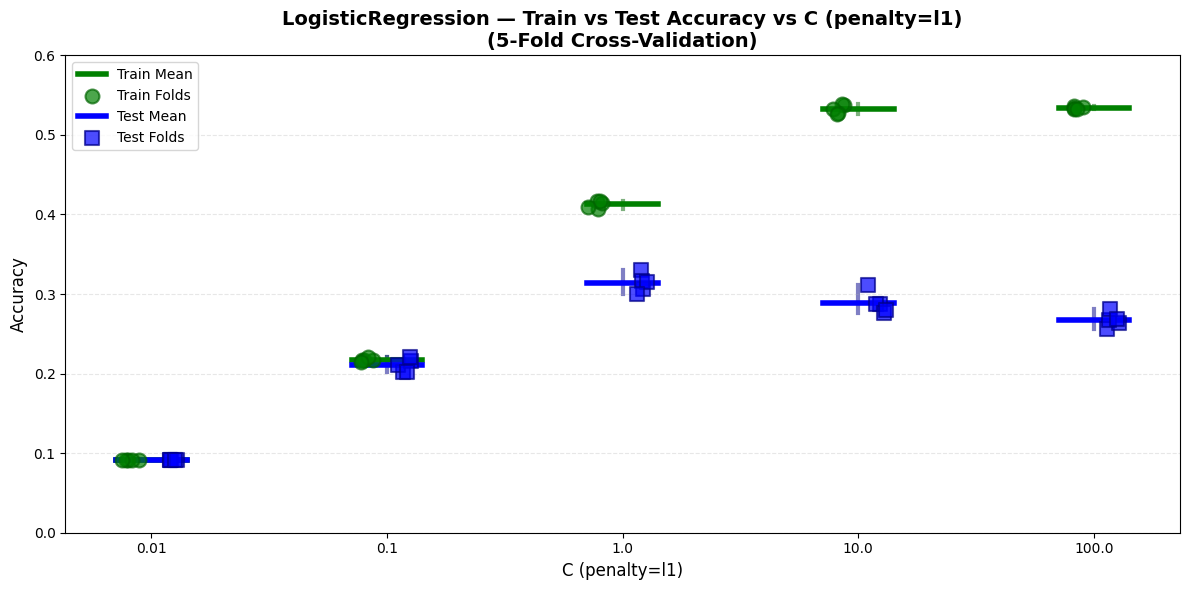

In [28]:
x_vals = [0.01, 0.1, 1.0, 10.0, 100.0]
printable_x_vals = [0.01, 0.1, 1.0, 10.0, 100.0]
test_vals = [l1_c_results[key].val.accuracy.all for key in x_vals]
train_vals = [l1_c_results[key].train.accuracy.all for key in x_vals]
plot_cv_train_test_comparison(printable_x_vals, train_vals, test_vals, "LogisticRegression", "C (penalty=l1)", ylim=(0.0, 0.6))

In [29]:
# Experiment: ElasticNet penalty with different C values
elasticnet_c_results = {}

bovw_params = {
    "detector_type": "SIFT",
    "codebook_size": 512,
    "detector_kwargs": {"nfeatures": 1000},
}

for C in [0.01, 0.1, 1.0, 10.0, 100.0]:
    print(f"\n=== Testing ElasticNet with C={C} ===")
    
    classifier_cls = LogisticRegression
    classifier_params = {
        "C": C,
        "penalty": "elasticnet",
        "solver": "saga",
        "l1_ratio": 0.5,  # Equal mix of L1 and L2
        "max_iter": 1000,
        "class_weight": "balanced",
        "random_state": SEED,
    }
    
    scores = cross_validate_bovw(
        dataset=data_train,
        bovw_kwargs=bovw_params,
        classifier_cls=classifier_cls,
        classifier_kwargs=classifier_params,
        n_splits=5
    )
    
    elasticnet_c_results[C] = scores
    print(f"C={C} -> Test Accuracy: {scores.val.accuracy.mean:.4f} ± {scores.val.accuracy.std:.4f}")


print("\n\n=== ELASTICNET PENALTY: C COMPARISON ===")
for C, result in elasticnet_c_results.items():
    print(f"C={C:6.2f} -> Train: {result.train.accuracy.mean:.4f} ± {result.train.accuracy.std:.4f} | Test: {result.val.accuracy.mean:.4f} ± {result.val.accuracy.std:.4f}")


=== Testing ElasticNet with C=0.01 ===


Phase [Setup]: Extracting the descriptors:  50%|████▉     | 4338/8700 [00:01<00:01, 2692.96it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2676.05it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


  0%|          | 0/5 [00:00<?, ?it/s]/home/arnau-marcos-almansa/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/arnau-marcos-almansa/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 20%|██        | 1/5 [00:07<00:28,  7.07s/it]/home/arnau-marcos-almansa/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division

C=0.01 -> Test Accuracy: 0.0896 ± 0.0051

=== Testing ElasticNet with C=0.1 ===


Phase [Setup]: Extracting the descriptors:  49%|████▉     | 4280/8700 [00:01<00:01, 2691.34it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2663.64it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


100%|██████████| 5/5 [00:45<00:00,  9.00s/it]


C=0.1 -> Test Accuracy: 0.2379 ± 0.0108

=== Testing ElasticNet with C=1.0 ===


Phase [Setup]: Extracting the descriptors:  50%|████▉     | 4307/8700 [00:01<00:01, 2692.49it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2662.16it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


100%|██████████| 5/5 [00:55<00:00, 11.11s/it]


C=1.0 -> Test Accuracy: 0.3258 ± 0.0057

=== Testing ElasticNet with C=10.0 ===


Phase [Setup]: Extracting the descriptors:  49%|████▉     | 4270/8700 [00:01<00:01, 2659.05it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2649.83it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


100%|██████████| 5/5 [01:39<00:00, 19.86s/it]


C=10.0 -> Test Accuracy: 0.2927 ± 0.0068

=== Testing ElasticNet with C=100.0 ===


Phase [Setup]: Extracting the descriptors:  49%|████▉     | 4281/8700 [00:01<00:01, 2686.85it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2657.76it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


100%|██████████| 5/5 [06:08<00:00, 73.74s/it]

C=100.0 -> Test Accuracy: 0.2801 ± 0.0100


=== ELASTICNET PENALTY: C COMPARISON ===
C=  0.01 -> Train: 0.0897 ± 0.0051 | Test: 0.0896 ± 0.0051
C=  0.10 -> Train: 0.2518 ± 0.0054 | Test: 0.2379 ± 0.0108
C=  1.00 -> Train: 0.4338 ± 0.0059 | Test: 0.3258 ± 0.0057
C= 10.00 -> Train: 0.5259 ± 0.0065 | Test: 0.2927 ± 0.0068
C=100.00 -> Train: 0.5348 ± 0.0044 | Test: 0.2801 ± 0.0100


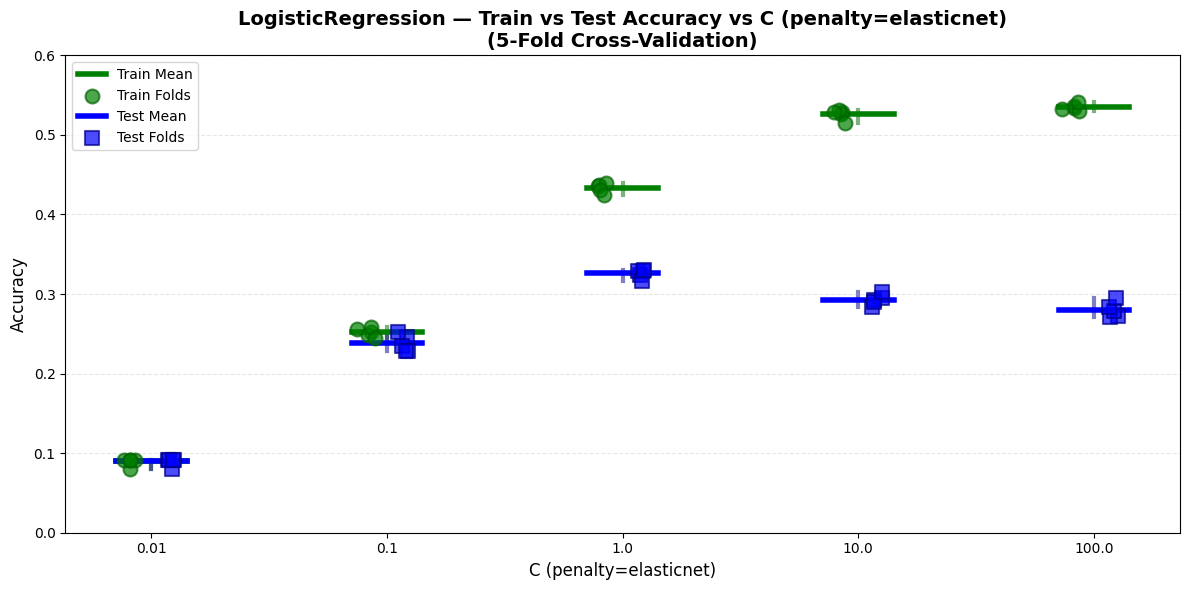

In [30]:
x_vals = [0.01, 0.1, 1.0, 10.0, 100.0]
printable_x_vals = [0.01, 0.1, 1.0, 10.0, 100.0]
test_vals = [elasticnet_c_results[key].val.accuracy.all for key in x_vals]
train_vals = [elasticnet_c_results[key].train.accuracy.all for key in x_vals]
plot_cv_train_test_comparison(printable_x_vals, train_vals, test_vals, "LogisticRegression", "C (penalty=elasticnet)", ylim=(0.0, 0.6))